In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [8]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [9]:
# Define linear regression model

model = nn.Linear(1,1,bias = True)

# Define optimizer and loss
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum= 0.9)

In [11]:
# Train the model

total_loss = 0
for n in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train) 
    
    # forward pass - independent of data shape input
    outputs = model(inputs)
    
    # loss calculation
    loss = criterion(outputs, targets)
    
    # backward pass
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    # print _loss
    
    total_loss += loss
    if n % 10 == 9:
        print('epoch ',n+1, ' loss: ', round(total_loss.item() / 10,2))
        total_loss = 0

epoch  10  loss:  0.19
epoch  20  loss:  0.18
epoch  30  loss:  0.17
epoch  40  loss:  0.17
epoch  50  loss:  0.17
epoch  60  loss:  0.17


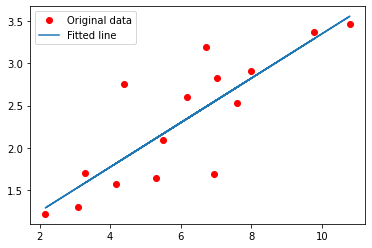

In [12]:
# plot
with torch.no_grad():
    predicted = model(torch.from_numpy(x_train)).detach().numpy()
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, predicted, label='Fitted line')
    plt.legend()
    plt.show()

In [14]:
# save the model
torch.save(model.state_dict(),'linear_model_toy.pth')